# Personal Loan Campaign: Logistic Regression & Decision Tree
### By: Swaraj Tripathy

The goal of this analysis is to build models to predict which liability customers, or depositors, will purchase a loan for AllLife Bank. I will be creating logistic regression and decision tree models. Using this analysis, AllLife Bank will be able to create a targeted campaign to improve their conversion rate of liability customers to personal loan customers.

We aim to answer the following questions: Which liability customers are most likely to purchase a loan? What factors are most important in determining if a customer will purchase a loan or not? What kinds of customers should be targeted with ads to improve the conversion rate of liability customers to personal loan customers?

In [1]:
# import relevant libraries

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library for logistic regression models
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

## Exploratory Data Analysis

In [2]:
# load in the data
raw_data = pd.read_csv("Loan_Modelling.csv")

# make a copy of data to be manipulated
data = raw_data.copy()
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# shape of the dataset
data.shape

(5000, 14)

In [4]:
# statistical summary of numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
# data types and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# check for duplicate rows
data.duplicated().sum()

0

In [7]:
# check value counts
cols = data.columns

# drop columns where value counts are not meaningful
cols = cols.drop(["ID", "Income", "Mortgage", "CCAvg"]) 
for i in cols:
    print(data[i].value_counts().sort_values(ascending = False))
    print()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
62    123
29    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 6     119
 8     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Ex

In [8]:
# checks number of unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# check for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Data Pre-Processing

In [10]:
# drop ID column
data.drop(["ID"], axis = 1, inplace = True)

In [11]:
# gets rows with experience levels -2 and -3 to convert them all to -1, the "unknown" level
data[data["Experience"] < -1] = data[data["Experience"] < -1].replace([-2, -3], -1)

# check to make sure it worked
data[data["Experience"] < -1]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


- All columns either have a hierarchy in values, or are binary, so there is no need for dummy variables
- All variables are numeric, so we are ready to fit the models

### Univariate Analysis

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
def labeled_barplot(data, feature, perc=False, n=None, title = ""):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    title: title of the graph
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.title(title)    
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

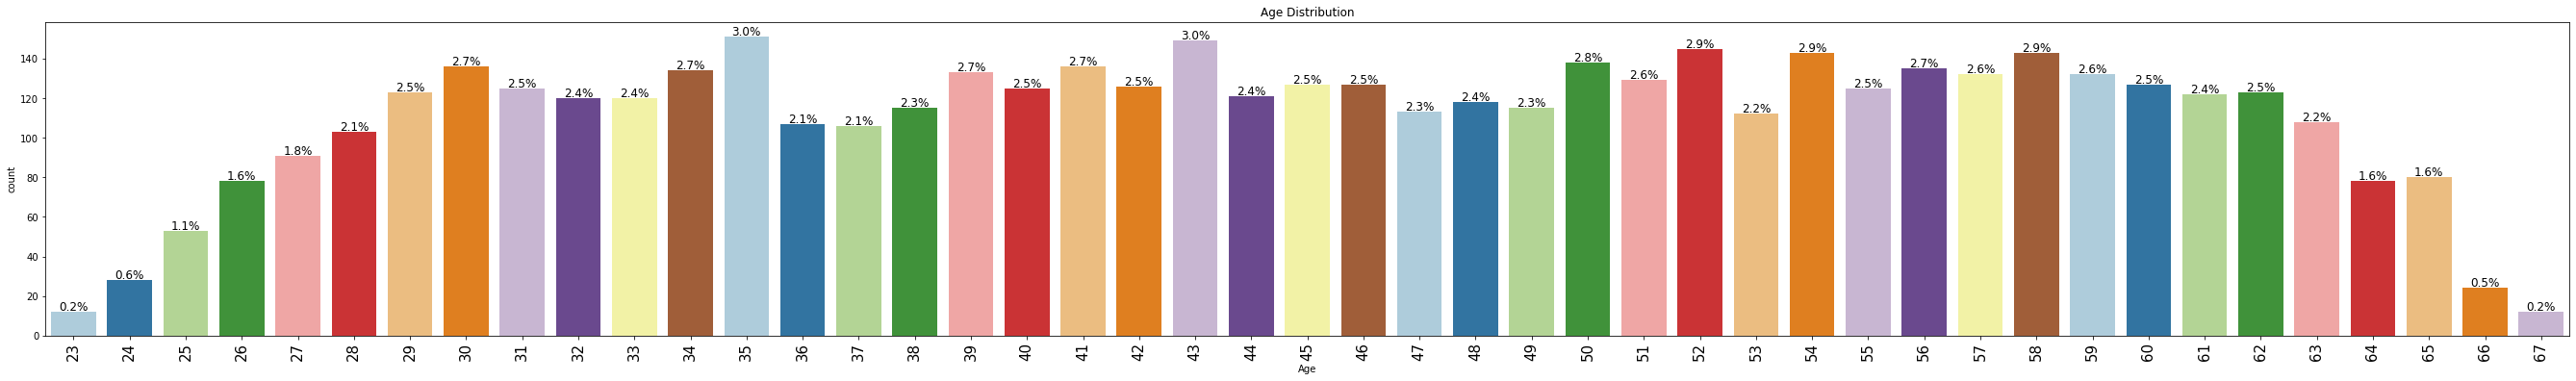

In [15]:
# barplot of age
labeled_barplot(data, "Age", perc = True, title = "Age Distribution")

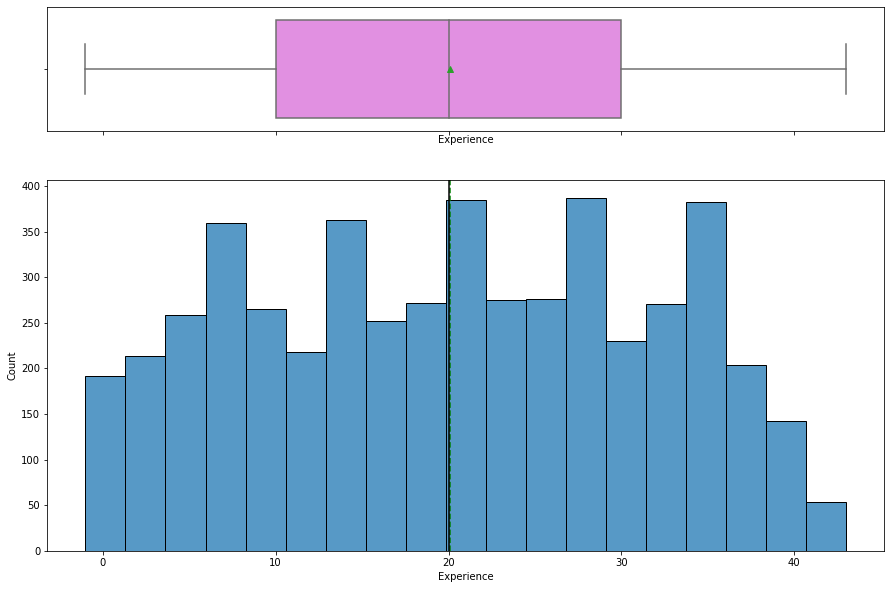

In [16]:
# distribution of work experience
histogram_boxplot(data, "Experience")

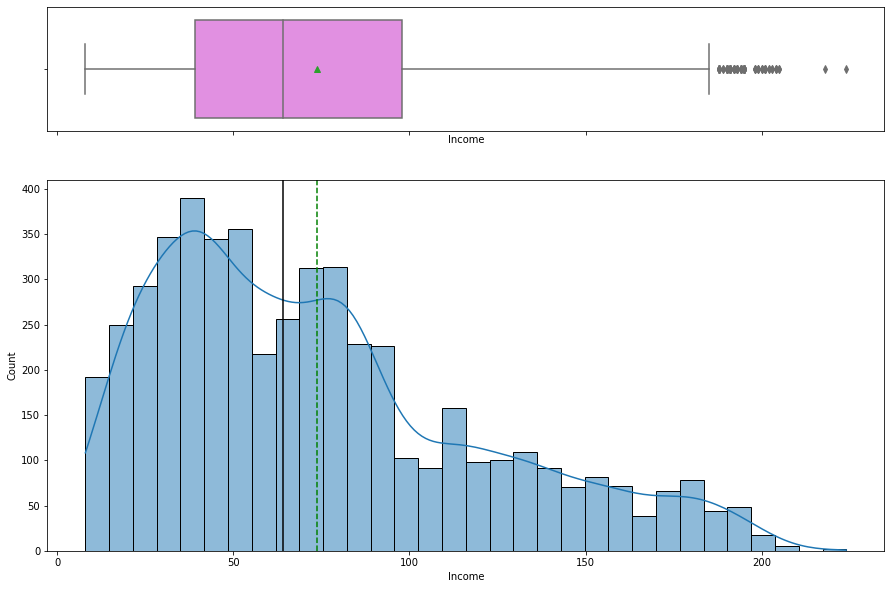

In [17]:
# distribution of income (in thousands of dollars)
histogram_boxplot(data, "Income", kde = True)

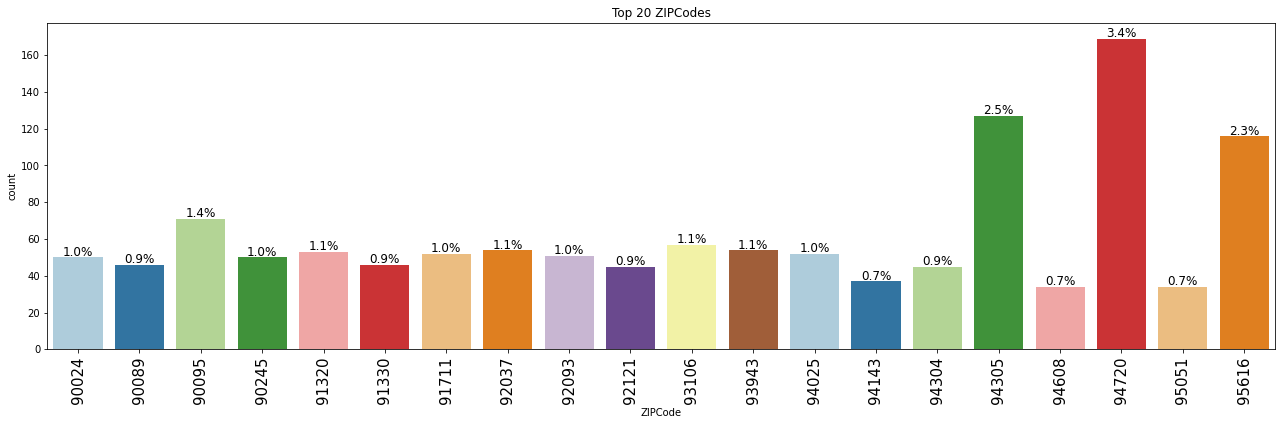

In [18]:
# barplot of top 20 zipcodes
labeled_barplot(data, "ZIPCode", perc = True, n = 20, title = "Top 20 ZIPCodes")

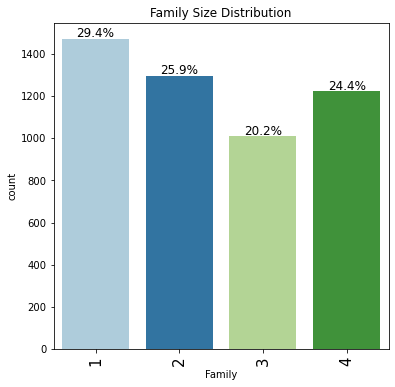

In [19]:
# barplot of family size
labeled_barplot(data, "Family", perc = True, title = "Family Size Distribution")

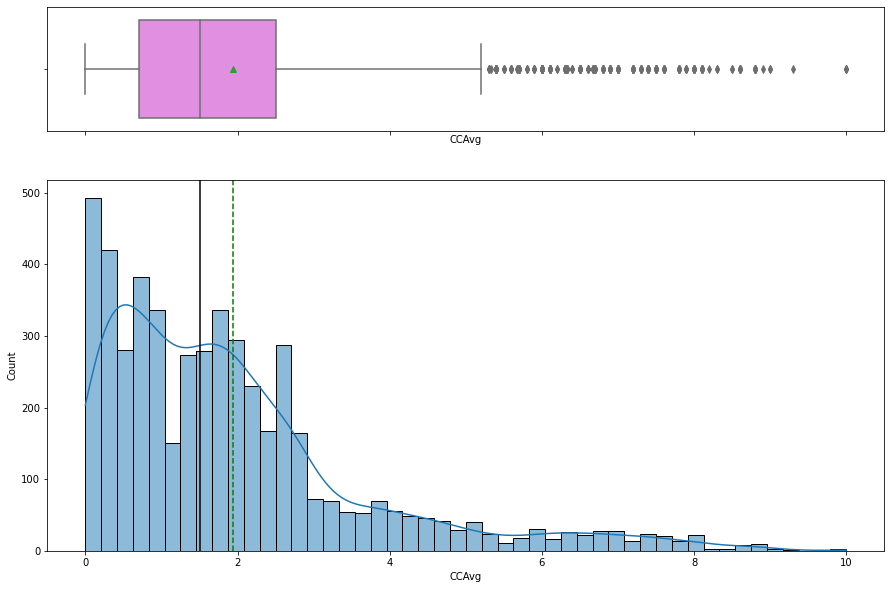

In [20]:
# distribution of credit card spending average (in thousands of dollars)
histogram_boxplot(data, "CCAvg", kde = True)

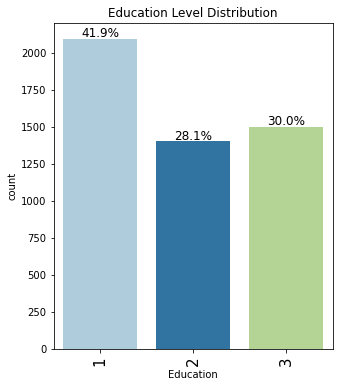

In [21]:
# barplot of education level: 1: Undergrad, 2: Graduate, 3: Advanced/Professional
labeled_barplot(data, "Education", perc = True, title = "Education Level Distribution")

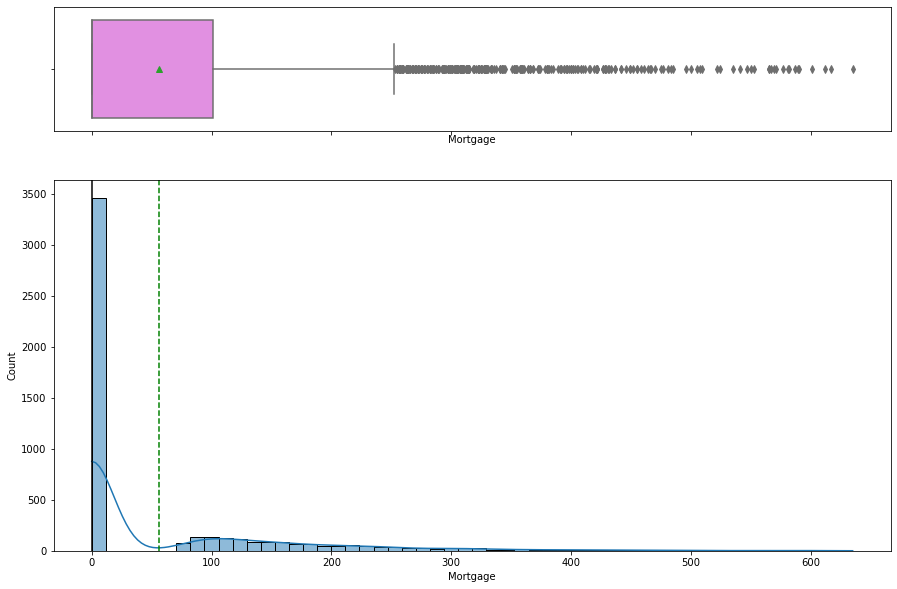

In [22]:
# distribution of mortgage value (in thousands of dollars)
histogram_boxplot(data, "Mortgage", kde = True)

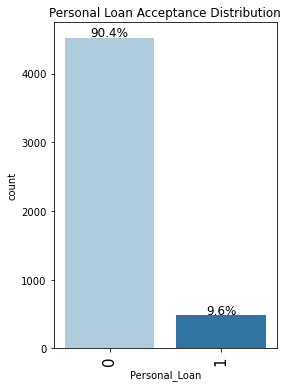

In [23]:
# barplot of personal loan acceptance (0: No, 1: Yes)
# this is our target variable
labeled_barplot(data, "Personal_Loan", perc = True, title = "Personal Loan Acceptance Distribution")

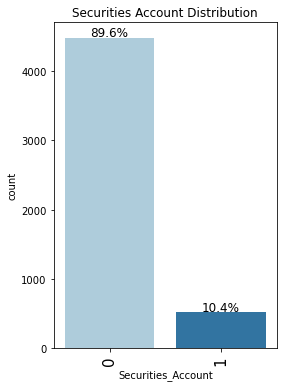

In [24]:
# barplot of if customer has a securities account with AllLife Bank (0: No, 1: Yes)
labeled_barplot(data, "Securities_Account", perc = True, title = "Securities Account Distribution")

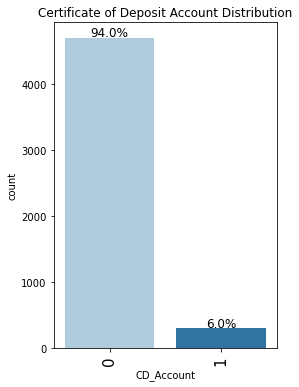

In [25]:
# barplot of if customer has a certificate of deposit account with AllLife Bank (0: No, 1: Yes)
labeled_barplot(data, "CD_Account", perc = True, title = "Certificate of Deposit Account Distribution")

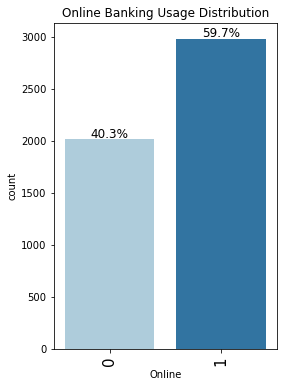

In [26]:
# barplot of if customer uses online banking (0: No, 1: Yes)
labeled_barplot(data, "Online", perc = True, title = "Online Banking Usage Distribution")

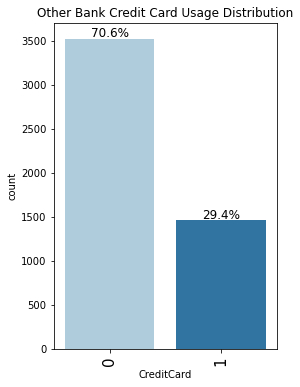

In [27]:
# barplot of if customer uses a credit card at any other banks (0: No, 1: Yes)
labeled_barplot(data, "CreditCard", perc = True, title = "Other Bank Credit Card Usage Distribution")

- Only about 10% of customers in the data accepted the personal loan overall
- Income, credit card spending, and mortgage value are all right skewed
- About 60% of customers use online banking services
- Over 70% of customers do not have credit cards at other banks
- The age distribution is relatively uniform for ages 30-60
- Family size distribution is also pretty uniform
- The work experience distribution is not skewed and is centered around the mean of 20 years of experience

### Bivariate Analysis

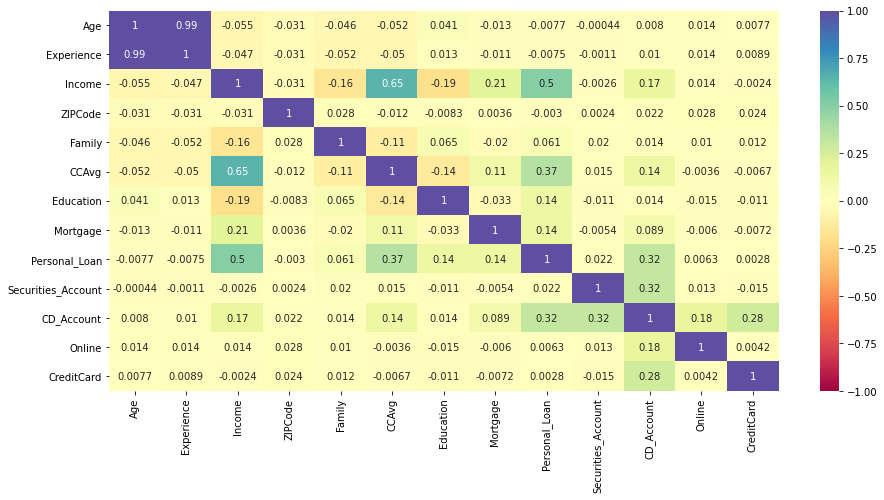

In [28]:
# heatmap of data
plt.figure(figsize = (15, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Spectral");

- Based on the heatmap, income, credit card spending, and certificate of deposit accounts are most closely related to personal loan acceptance, all with positive correlations
- Age and experience are very strongly positively correlated, which makes sense intuitively
- We also see that income and credit card spending have a positive correlation
- Interestingly, education and income as well as education and family size are weakly negatively correlated, which is unexpected

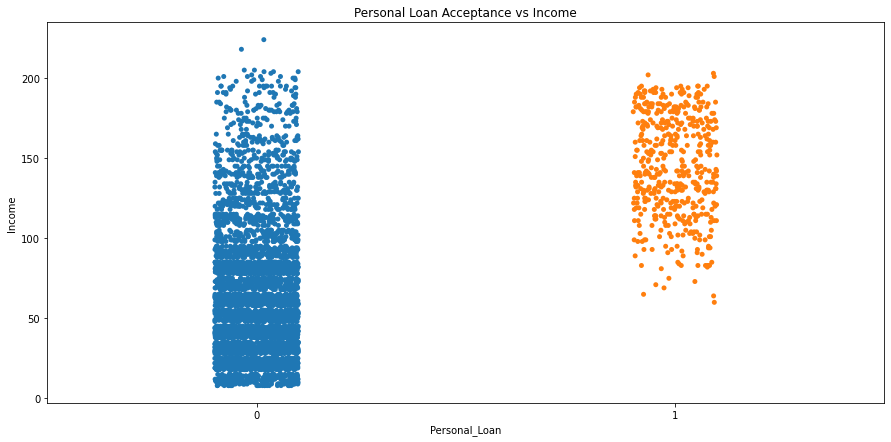

In [29]:
# Personal Loan Acceptance vs Income
plt.figure(figsize = (15, 7))
plt.title("Personal Loan Acceptance vs Income")
sns.stripplot(data = data, x = "Personal_Loan", y = "Income");

- No customers with an income below ~55K accepted the loan
- No customers with an income above ~210K accepted the loan

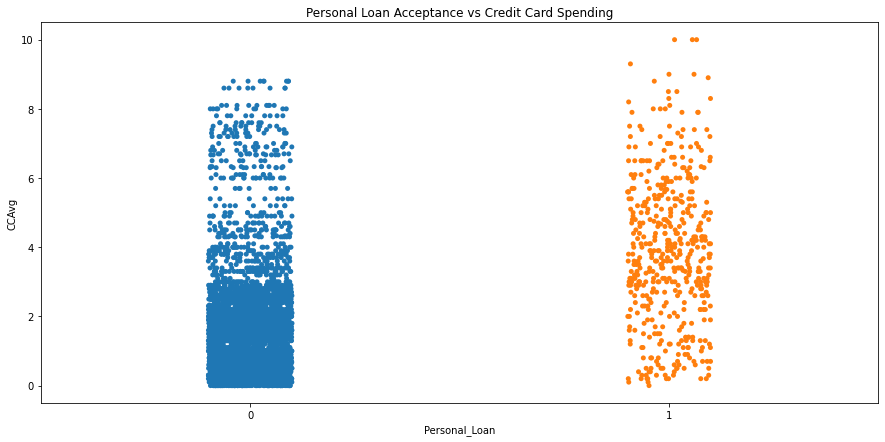

In [30]:
# Personal Loan Acceptance vs Credit Card Spending
plt.figure(figsize = (15, 7))
plt.title("Personal Loan Acceptance vs Credit Card Spending")
sns.stripplot(data = data, x = "Personal_Loan", y = "CCAvg");

- Every customer with credit card spending above ~9K accepted the loan
- Many more customers with lower credit card spending did not accept the loan

In [31]:
# Personal Loan Acceptance vs Certificate of Deposit Account
pd.crosstab(index = data["Personal_Loan"], columns = data["CD_Account"])

CD_Account,0,1
Personal_Loan,,
0,4358,162
1,340,140


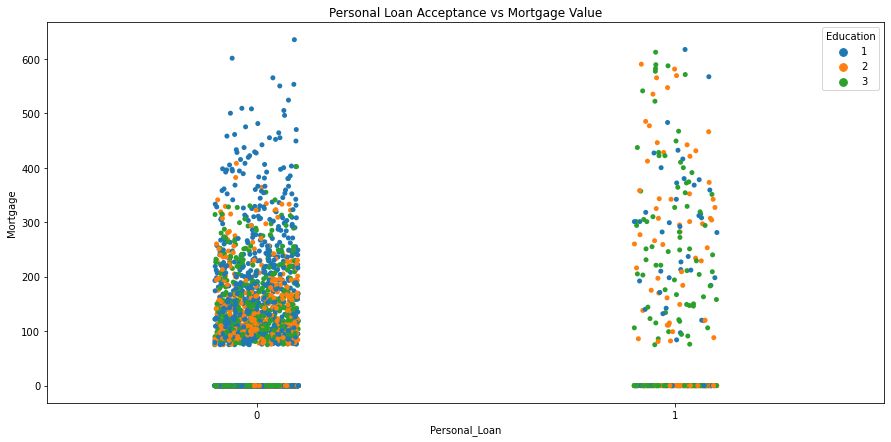

In [32]:
# Personal Loan Acceptance vs Mortgage Value
plt.figure(figsize = (15, 7))
plt.title("Personal Loan Acceptance vs Mortgage Value")
sns.stripplot(data = data, x = "Personal_Loan", y = "Mortgage", hue = "Education");

- Many more customers with lower mortgage values did not accept the loan
- Customers with high mortgage values and education group 1 typically did not accept the loan

## Model Building

### Logistic Regression Model

In [33]:
# splitting the data
X = data.drop('Personal_Loan', axis = 1)     
y = data['Personal_Loan']   

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [34]:
# checking to make sure the data was split evenly
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize = True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [35]:
# Fit the model on training data
log_mod = LogisticRegression(random_state = 1)
log_mod.fit(x_train, y_train)

# predict on testing data
y_predict = log_mod.predict(x_test)

# converting coefficients to odds
odds = np.exp(log_mod.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(log_mod.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Coef": log_mod.coef_[0], "Odds": odds, "Change_odd%": perc_change_odds}, index = x_train.columns).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Coef,-0.000413,-0.000410,0.036323,-0.000066,0.000175,0.001108,0.000230,0.000849,0.000009,0.000141,0.000013,0.000006
Odds,0.999587,0.999590,1.036991,0.999934,1.000175,1.001109,1.000230,1.000850,1.000009,1.000141,1.000013,1.000006
Change_odd%,-0.041341,-0.040959,3.699064,-0.006552,0.017501,0.110867,0.022968,0.084956,0.000941,0.014067,0.001291,0.000584


- Income had the highest positive coefficient, meaning increasing income increases the probability of accepting the loan
- A \$1000 increase in income was associated with a 3.7\% better chance of accepting the loan 
- Similarly, credit card spending had the second highest coefficient, so it also increases the probability of accepting the loan
- A \$1000 increase in average credit card spending was associated with a 0.1\% better chance of accepting the loan

In [36]:
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [37]:
# training performance
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    log_mod, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.908571,0.323263,0.527094,0.400749


In [38]:
# testing performance
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    log_mod, x_test, y_test
)

print("Testing performance:")
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.908,0.295302,0.571429,0.389381


In order to most effectively measure the performance of our model, we are most concerned with recall. We do not look to much at accuracy because the data is unbalanced with only 10% of the customers accepting the loan in the first place, which is likely contributing to the 91% accuracy. Also, the error associated with recall means the bank will not target customers who are likely to purchase the loan, which is much more costly than the precision error of offering the loan to customers who are not likely to purchase it. So, going forward, we want to maximize recall. F1 score also measures precision and recall together, but we are more concerned with just recall for now.

- All performance measures are similar on both the training and testing data, which indicates that our model is not overfitting
- The high 91% accuracy is likely due to the balance of the data, as about 90% of the customers did not purchase the loan
- The recall is low at 30% in testing data
- The recall in testing data implies the bank would miss out on 70% of customers who are likely to purchase the loan, which is a big missed opportunity
- The precision increased in the testing data, but is still pretty low at 57%, and we are not too concerned with precision as a performance metric for this data

In [39]:
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

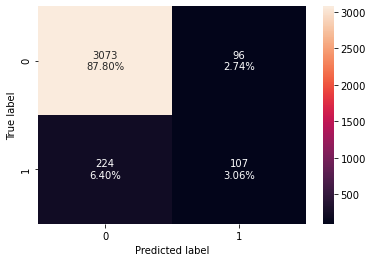

In [40]:
# creating confusion matrix on training data
confusion_matrix_sklearn_with_threshold(log_mod, x_train, y_train)

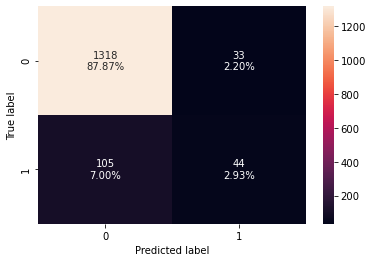

In [41]:
# creating confusion matrix on testing data
confusion_matrix_sklearn_with_threshold(log_mod, x_test, y_test)

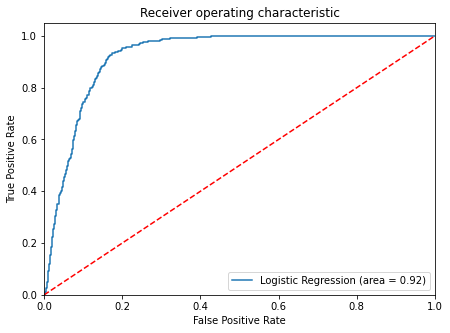

In [42]:
# AUC-ROC curve on training set
logit_roc_auc_train = roc_auc_score(y_train, log_mod.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, log_mod.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

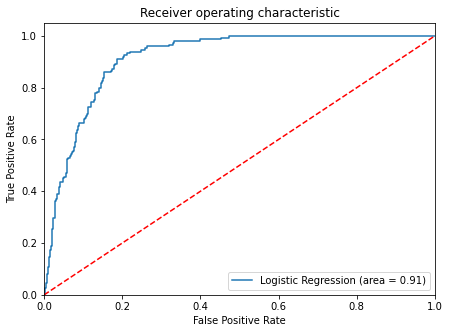

In [43]:
# AUC-ROC curve on testing set
logit_roc_auc_train = roc_auc_score(y_test, log_mod.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, log_mod.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [44]:
# Using AUC-ROC curves to find the optimal threshold in order to try improving our recall
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, log_mod.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07813542900786279


In [45]:
# checking model performance for this model on training set with optimal threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_mod, x_train, y_train, threshold = optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.836571,0.930514,0.359393,0.518519


In [46]:
# checking model performance for this model on testing set with optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_mod, x_test, y_test, threshold = optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.821333,0.899329,0.346253,0.5


- Although the accuracy has dropped slightly, the recall has increased tremendously, so this model is performing much better
- The precision also dropped, but the F1 score has still improved, and we are most concerned with recall anyway
- This model is only missing out on about 10% of customers who are likely to purchase the loan

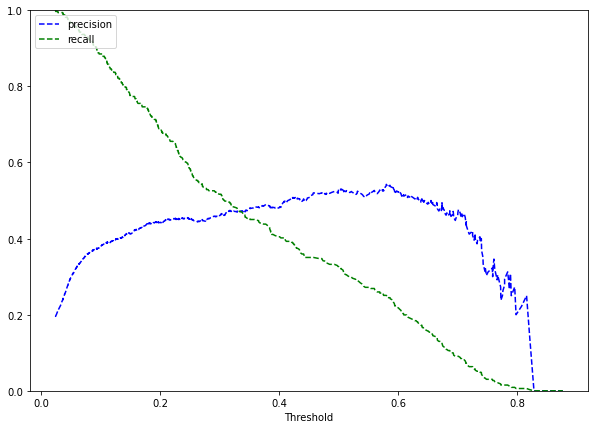

In [47]:
# we can also try to find an optimal threshold using the precision-recall curve

y_scores = log_mod.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

According to this chart, the optimal threshold could be 0.35 to maximize F1 score. So we can try those and see if our performance increases.

In [48]:
# checking model performance for this model on training set with optimal threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_mod, x_train, y_train, threshold = 0.35
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.901429,0.453172,0.477707,0.465116


In [49]:
# checking model performance for this model on testing set with optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    log_mod, x_test, y_test, threshold = 0.35
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.900667,0.456376,0.5,0.477193


- The F1 score is actually lower using this optimal threshold than the ROC curve optimized threshold.
- Additionally, the recall is much lower so we will stick to the other optimal threshold of 0.078

### Decision Tree Model

In [50]:
# build the decision tree with gini criteria to split and class weights to adjust for the unbalanced data
model = DecisionTreeClassifier(
    criterion = "gini", class_weight = {0: 0.90, 1: 0.10}, random_state=1
)

In [51]:
# train the model on the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)

In [52]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [53]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

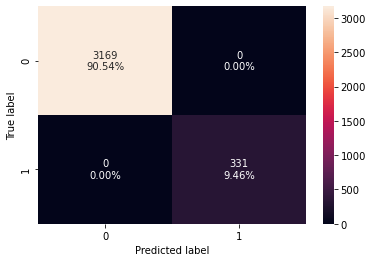

In [54]:
# model performance on training set
confusion_matrix_sklearn(model, x_train, y_train)

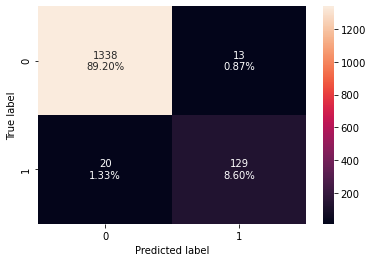

In [55]:
# model performance on testing set
confusion_matrix_sklearn(model, x_test, y_test)

In [56]:
# check recall score on training set
decision_tree_perf_train = get_recall_score(model, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


In [57]:
# check recall score on testing set
decision_tree_perf_test = get_recall_score(model, x_test, y_test)

print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8657718120805369


- The model had a perfect recall on the training set, which typically happens with decision trees, as it is very complex right now
- The model had slightly worse recall on the test set. Although it is a good recall, it is still lower than the optimized logistic regression model
- On the test set, this model missed out on ~13% of customers who purchased the loan 

#### Visualizing the Tree

In [58]:
# creating a list of column names
feature_names = x_train.columns.to_list()

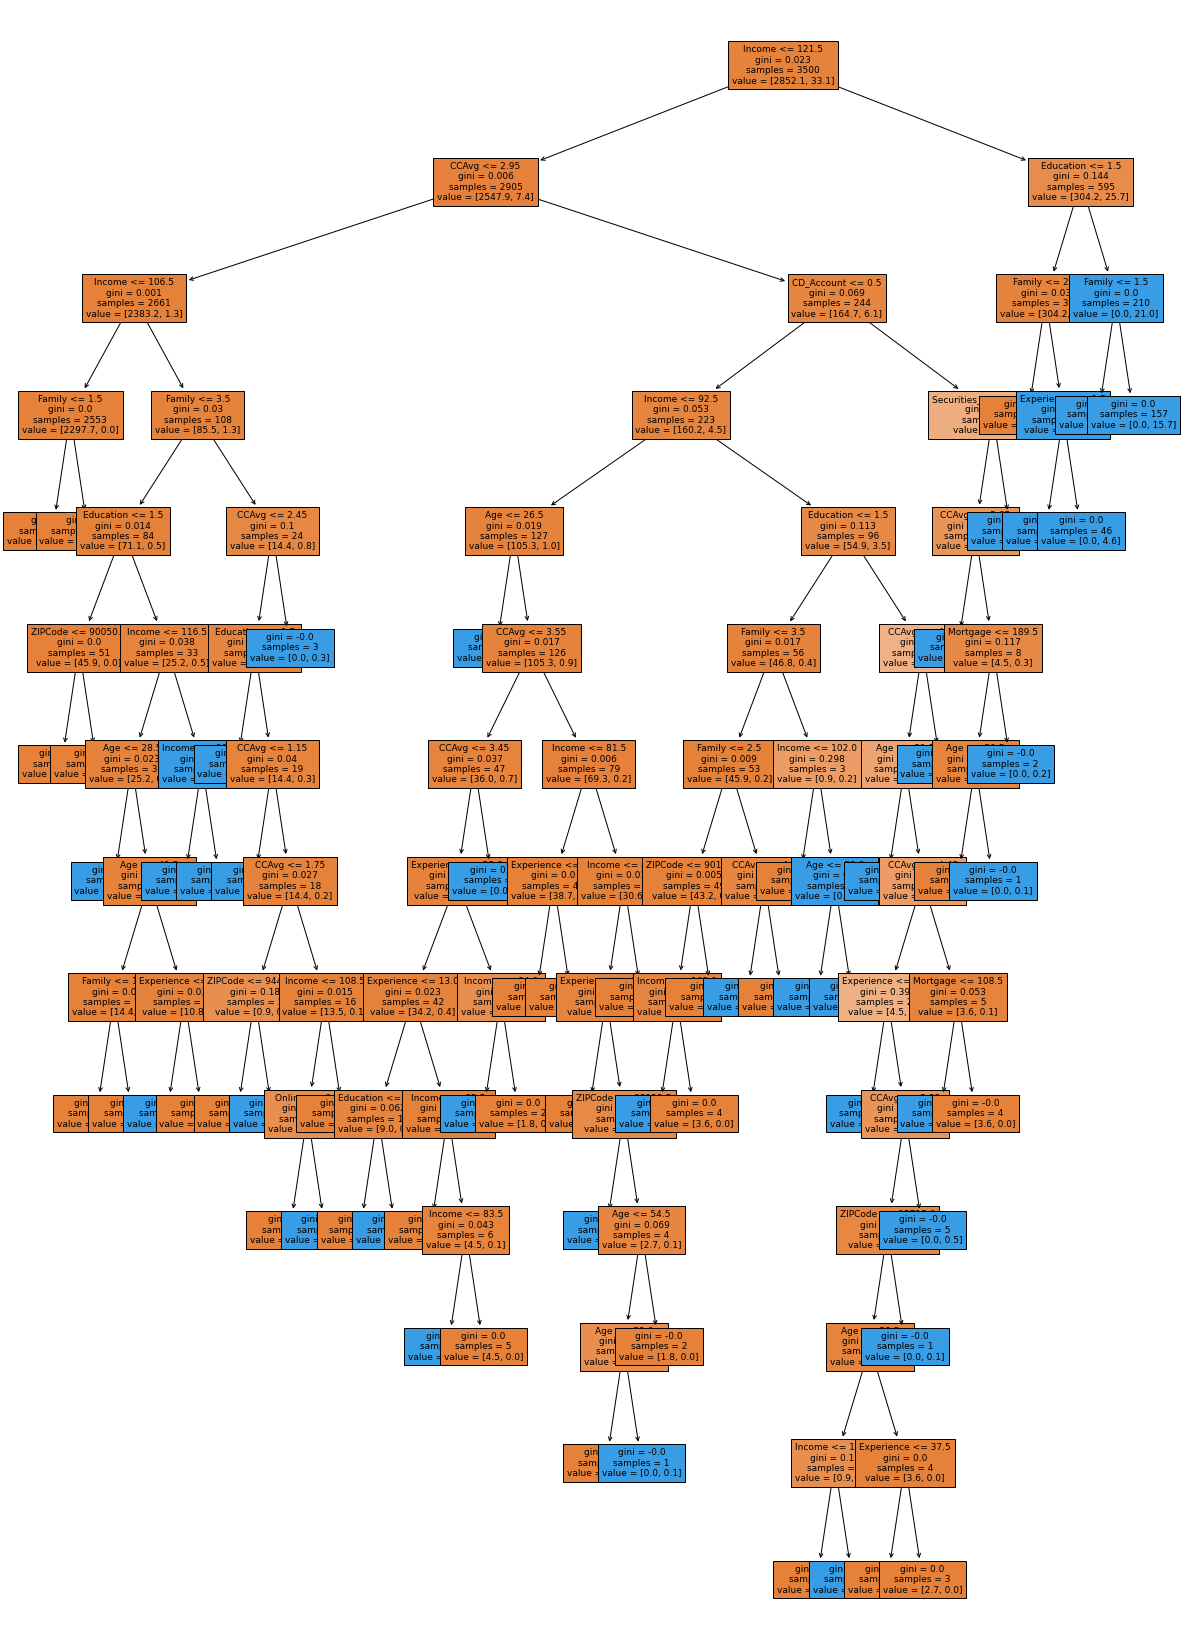

In [59]:
# creates a chart of the decision tree
plt.figure(figsize = (20, 30))
out = tree.plot_tree(
    model,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# adds arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [60]:
# gini importance of features, calculated by the normalised reduction in gini impurity for each feature
print(
    pd.DataFrame(
        model.feature_importances_, columns = ["Imp"], index = x_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                         Imp
Education           0.617568
Family              0.143379
Income              0.079344
CCAvg               0.064382
Experience          0.026105
Age                 0.021975
Securities_Account  0.017560
CD_Account          0.009926
Mortgage            0.008579
ZIPCode             0.008432
Online              0.002751
CreditCard          0.000000


- We see that for this decision tree, education level is by far the most important feature
- In the logistic regression model, income and credit card spending were the most important features, but in this model, education level and family size are much more important

#### GridSearchCV for Hyperparameter Tuning

In [61]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.90, 1: 0.10})

# Grid of parameters to choose from
parameters = {
    "max_depth": [3, 5, 10, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1)

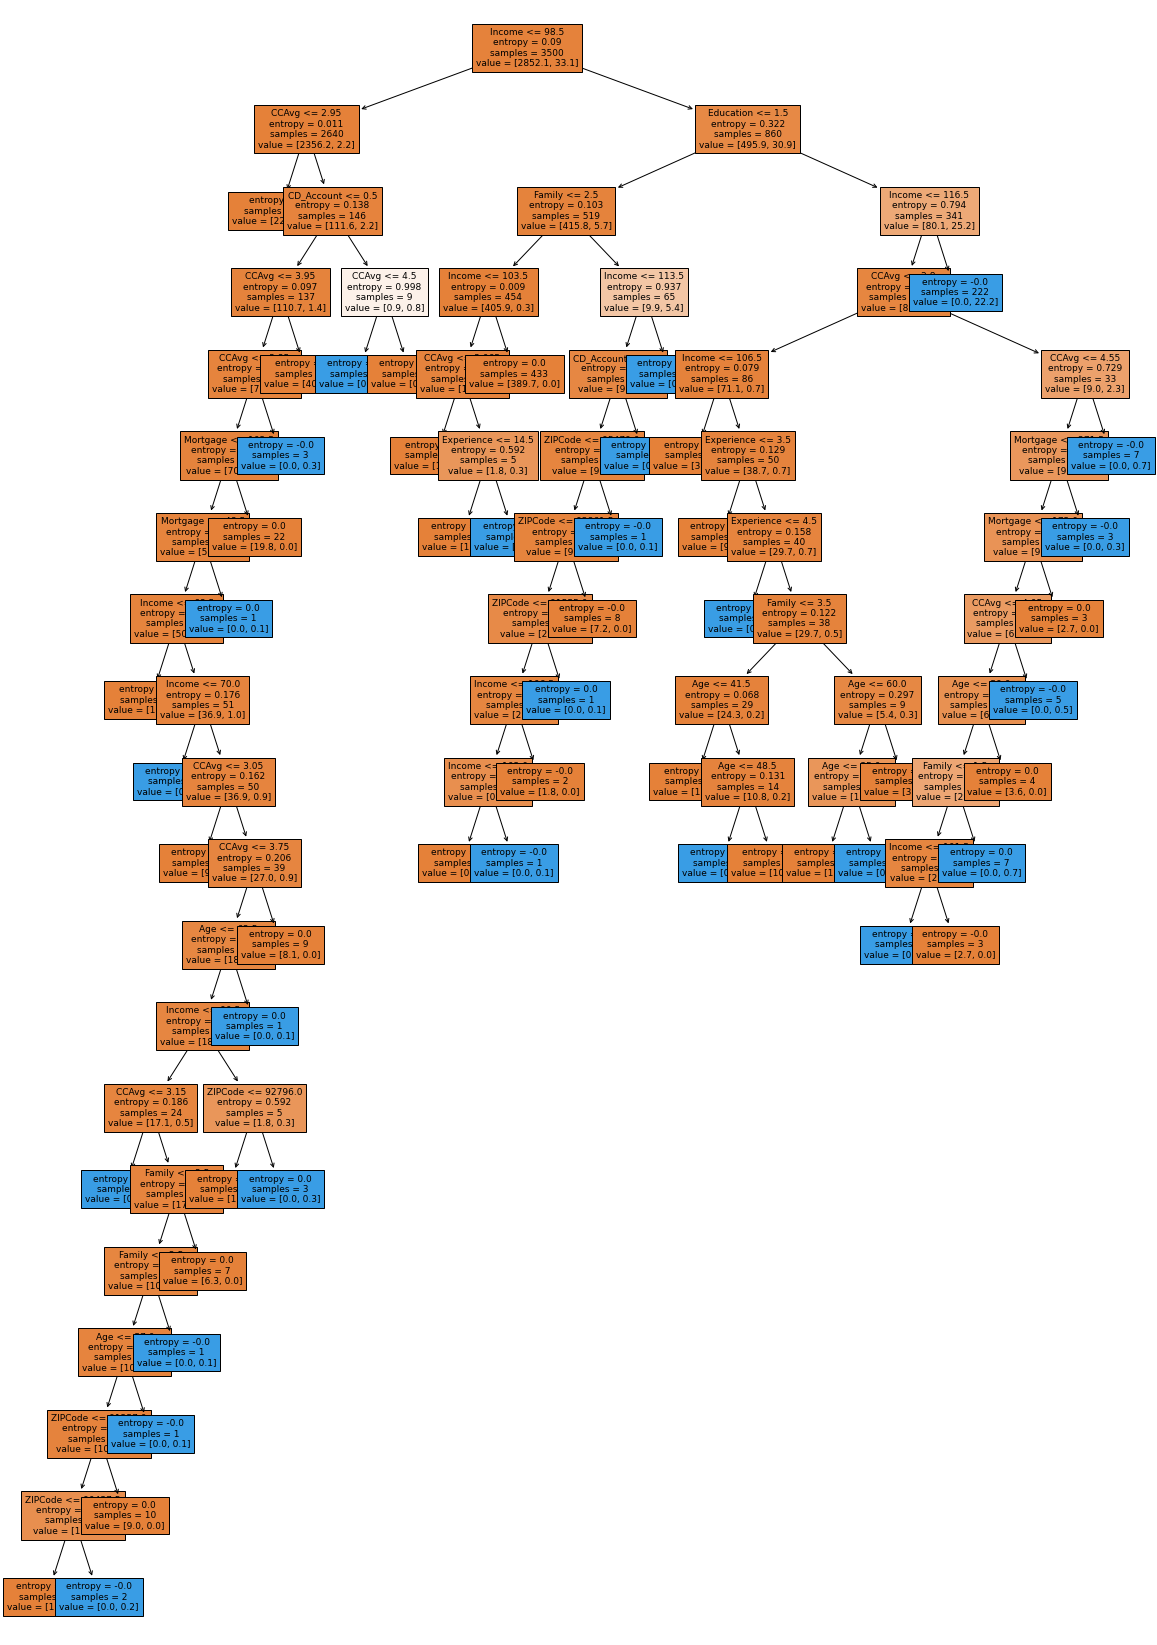

In [62]:
# creates a chart of the hyperparameter tuned decision tree
plt.figure(figsize = (20, 30))
out = tree.plot_tree(
    estimator,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# adds arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

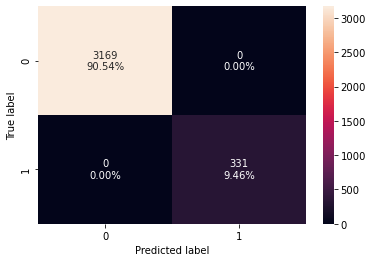

In [63]:
# confusion matrix on training set
confusion_matrix_sklearn(estimator, x_train, y_train)

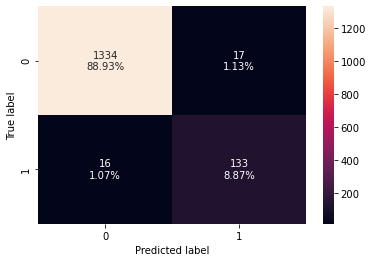

In [64]:
# confusion matrix on testing set
confusion_matrix_sklearn(estimator, x_test, y_test)

In [65]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


In [66]:
decision_tree_tune_perf_test = get_recall_score(estimator, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8926174496644296


- Recall for the hyperparameter tuned model increased by about 3% to 89.3% on the test set, bringing it about equal to the ROC curve optimized logistic regression model
- This model is also missing out on roughly 10% of customers who would purchase the loan

In [67]:
# gini importance of features on hyperparameter tuned tree
print(
    pd.DataFrame(
        estimator.feature_importances_, columns = ["Imp"], index = x_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                         Imp
Income              0.562727
Education           0.163025
Family              0.110521
CCAvg               0.092700
Age                 0.020181
CD_Account          0.015536
ZIPCode             0.015393
Experience          0.010122
Mortgage            0.009796
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


- Interestingly, in this model, we see income as the most important feature, similar to the logisitic regression models
- Education level and family size are still fairly important as well, but not nearly as much as income

In [68]:
# I also want to try manually pruning the tree using max_depth to see if the complex tree
# is really worth it for model performance
pruned_mod = DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1, max_depth = 10)

In [69]:
# fit the model
pruned_mod.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, criterion='entropy',
                       max_depth=10, min_impurity_decrease=1e-05,
                       random_state=1)

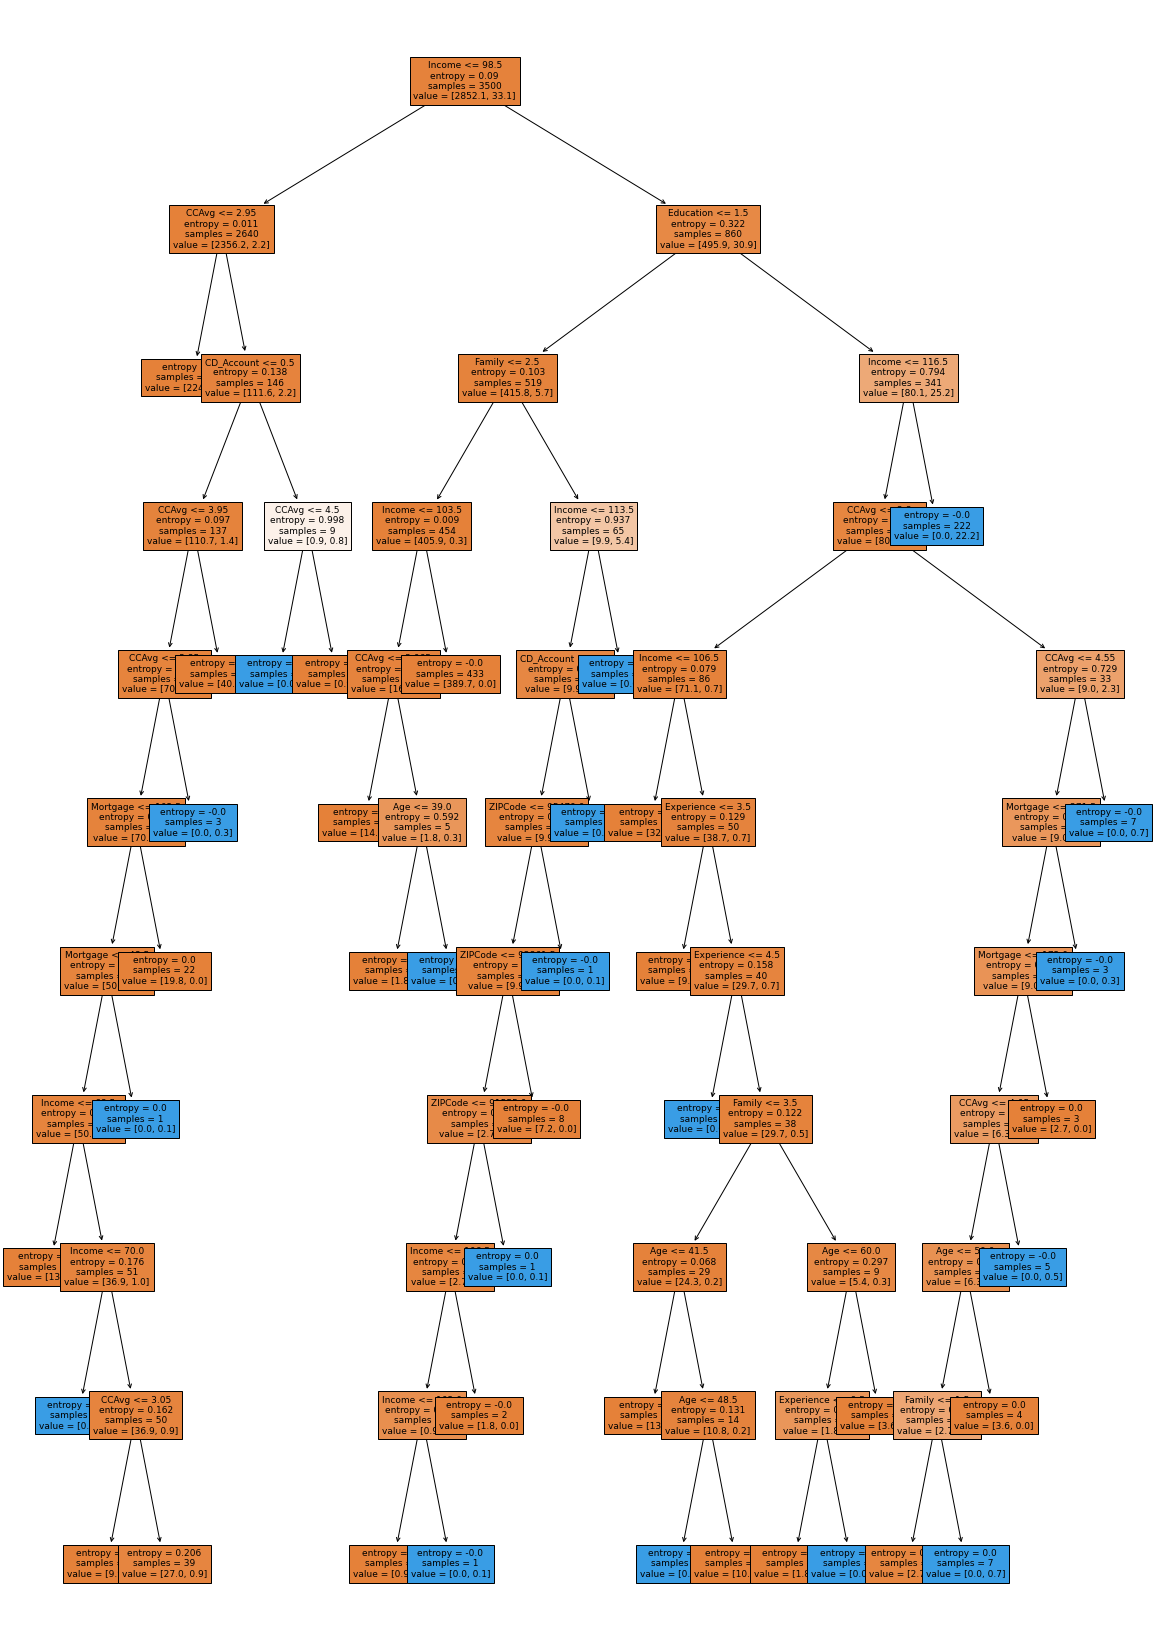

In [70]:
# creates a chart of the manually pruned decision tree
plt.figure(figsize = (20, 30))
out = tree.plot_tree(
    pruned_mod,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# adds arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

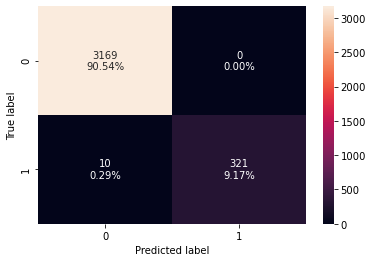

In [71]:
# confusion matrix on training set
confusion_matrix_sklearn(pruned_mod, x_train, y_train)

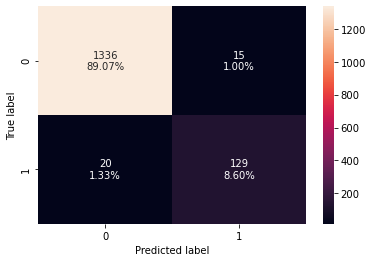

In [72]:
# confusion matrix on testing set
confusion_matrix_sklearn(pruned_mod, x_test, y_test)

In [73]:
decision_tree_tune_perf_train = get_recall_score(pruned_mod, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9697885196374623


In [74]:
decision_tree_tune_perf_test = get_recall_score(pruned_mod, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8657718120805369


In [75]:
# gini importance of features on pruned tree
print(
    pd.DataFrame(
        pruned_mod.feature_importances_, columns = ["Imp"], index = x_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                         Imp
Income              0.573140
Education           0.167098
Family              0.110292
CCAvg               0.091154
Age                 0.016750
CD_Account          0.015924
Experience          0.010375
Mortgage            0.010040
ZIPCode             0.005227
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


- We can get the same recall score using a pruned version of the hyperparameter tuned tree as the original tree
- However, the gridsearch hyperparameter tuned tree still provides the highest recall and is more simple than the original tree
- Although the hyperparameter tuned tree is more complex than the manually pruned version, the increase in recall is worth it as overall, the tree is not too complex
- If we prune the tree more by reducing the max_depth parameter, the performance starts to drop too much

## Recommendations and Insights

- The most important features for determining whether a customer will purchase a loan are Income and Education level
- No customers with an income below ~55K or above ~210K accepted the loan
- Every customer with credit card spending above ~9K accepted the loan
- Customers with high mortgage values and education group 1 (Bachelor's degree) typically did not accept the loan
- Both logistic regression and decision tree algorithms were able to create a model that resulted in ~90% recall
    - Only about 10% of customers who likely would have purchased the loan would not be targeted by the campaign
- In all decision trees, the first split was on income

- Implementing the hard income cuttoffs from the univariate analysis would help target the right customers for the campaign
    - This would also help reduce unessecarily targeting customers who won't purchase the loan and reduce the risk of losing their business because they are receiving bad offers, although this is a more minor concern for the campaign
- Additionally, using the decision tree to split customers into much more specific groups (customers who fit the same profile as leaf nodes) to determine whether or not to target a customer should result in only about 10% of customers who likely would have purchased the loan to miss out on being targeted by the campaign
    - This means 90% of customers who are expected to purchase the loan would be getting targeted by the campaign, which would greatly improve the conversion rate of liability customers
    - Even if the the campaign does not perform nearly as well as the model implies since decision trees are known to overfit data, and the conversion rate does not rise all the way to 90%, it will likely still increase from the current 9% conversion rate
- Using the logistic regression model with the decision tree could help make slight adjustments to the target customers based on features like income and credit card spending
    - On average a \\$1000 increase in income raises the probability of purchasing the loan by 3.7%, while a \$1000 increase in credit card spending increases the probability of purchasing the loan by 0.1%.
    - This information could be used to target existing customers who experience changes in income or credit card spending who may not have been targeted by the campaign originally